
# Регрессия


Регрессия — способ выбрать из семейства функций ту, которая минимизирует функцию потерь. Последняя характеризует насколько сильно пробная функция отклоняется от значений в заданных точках.

## 1. Импорт необходимых библиотек

Для регрессионного анализа и будем использовать функции библиотеки sklearn, для построения графиков будем использовать библиотеку matplotlib.
Для вычисления ошибок будем использовать коэффициент детерминации r2_score из библиотеки sklearn. Наилучшая возможная оценка - 1,0, и она может быть отрицательной (потому что модель может быть произвольно хуже). Постоянная модель, которая всегда предсказывает ожидаемое значение y, игнорируя входные характеристики, получит оценку 0,0. 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split

## 2. Генерация функции для регрессионного анализа и подготовка данных

Для регрессионного анализа был выбран полином 4 степени $x^4$ - 3$x^3$ - $x^2$ + 7x + 10000000000
Сгенерируем 500 значений этой функции в интервале (-10; 10). Получим следующий график:

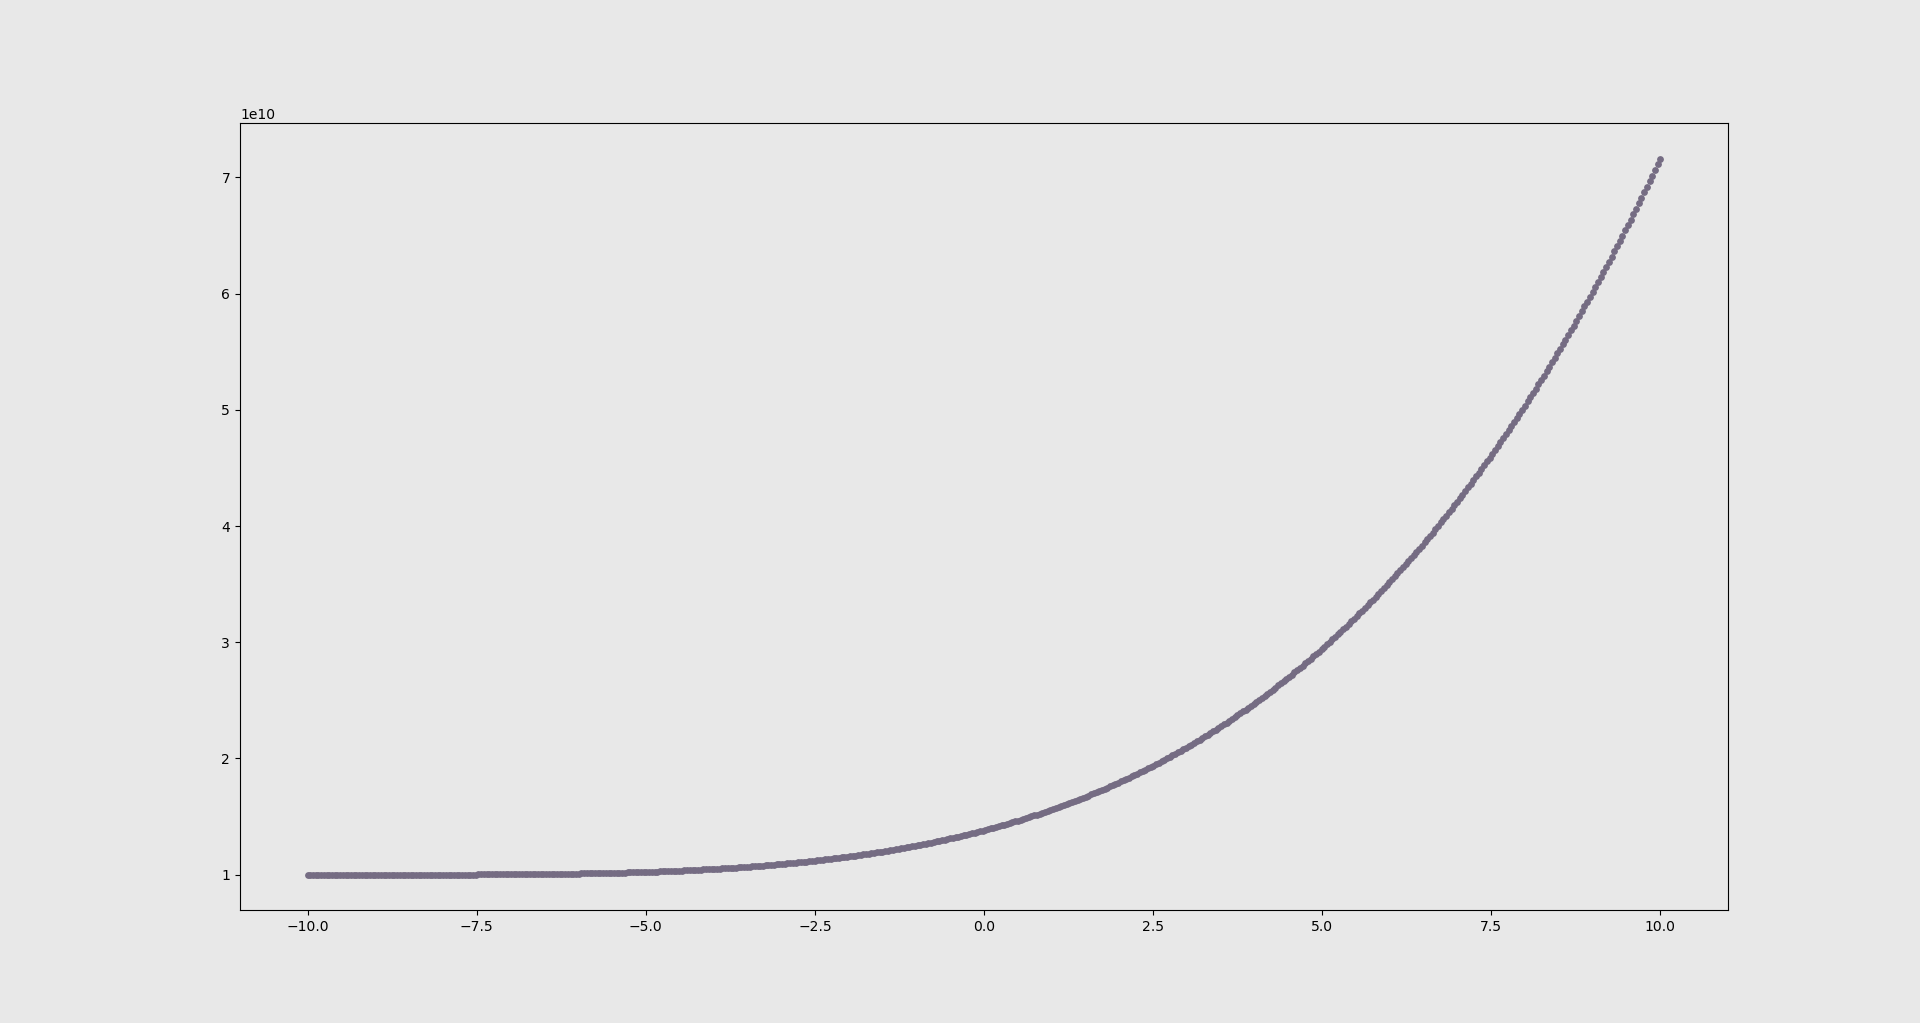


Немного зашумляем данные и получаем следующий график:

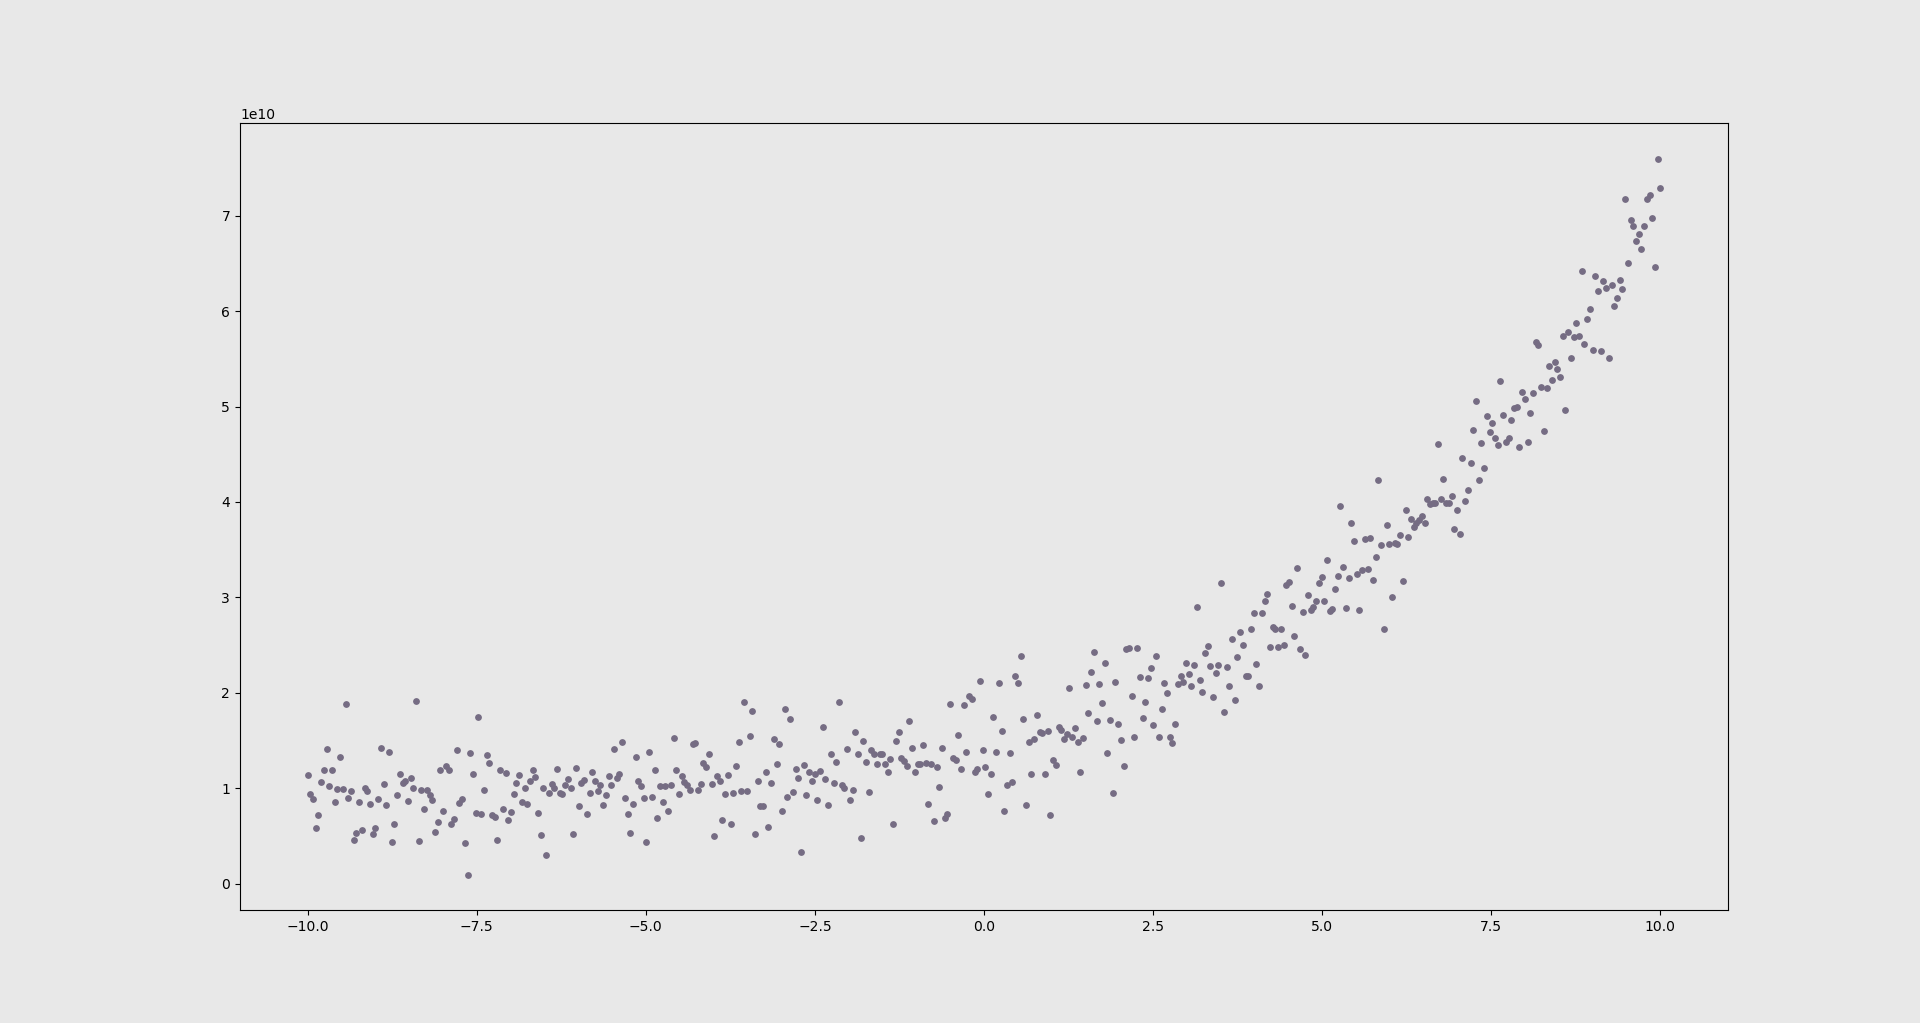


Разделяем данные на тестовые и тренировочные с помощью train_test_split. Для обучения берём 30% данных, для тестов - 70%:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3)

## 3. Линейная регрессия

Пробуем приблизить нашу функцию линейной регрессией, для этого используем функцию LinearRegression библиотеки sklearn. Ошибку высчитываем с помощью функции r2_score библиотеки sklearn:

In [ ]:
lin_reg = LinearRegression().fit(X_train, Y_train)
lin_prediction = lin_reg.predict(X_test)
lin_see = r2_score(Y_test, lin_prediction)

Получаем следующие график и ошибку:

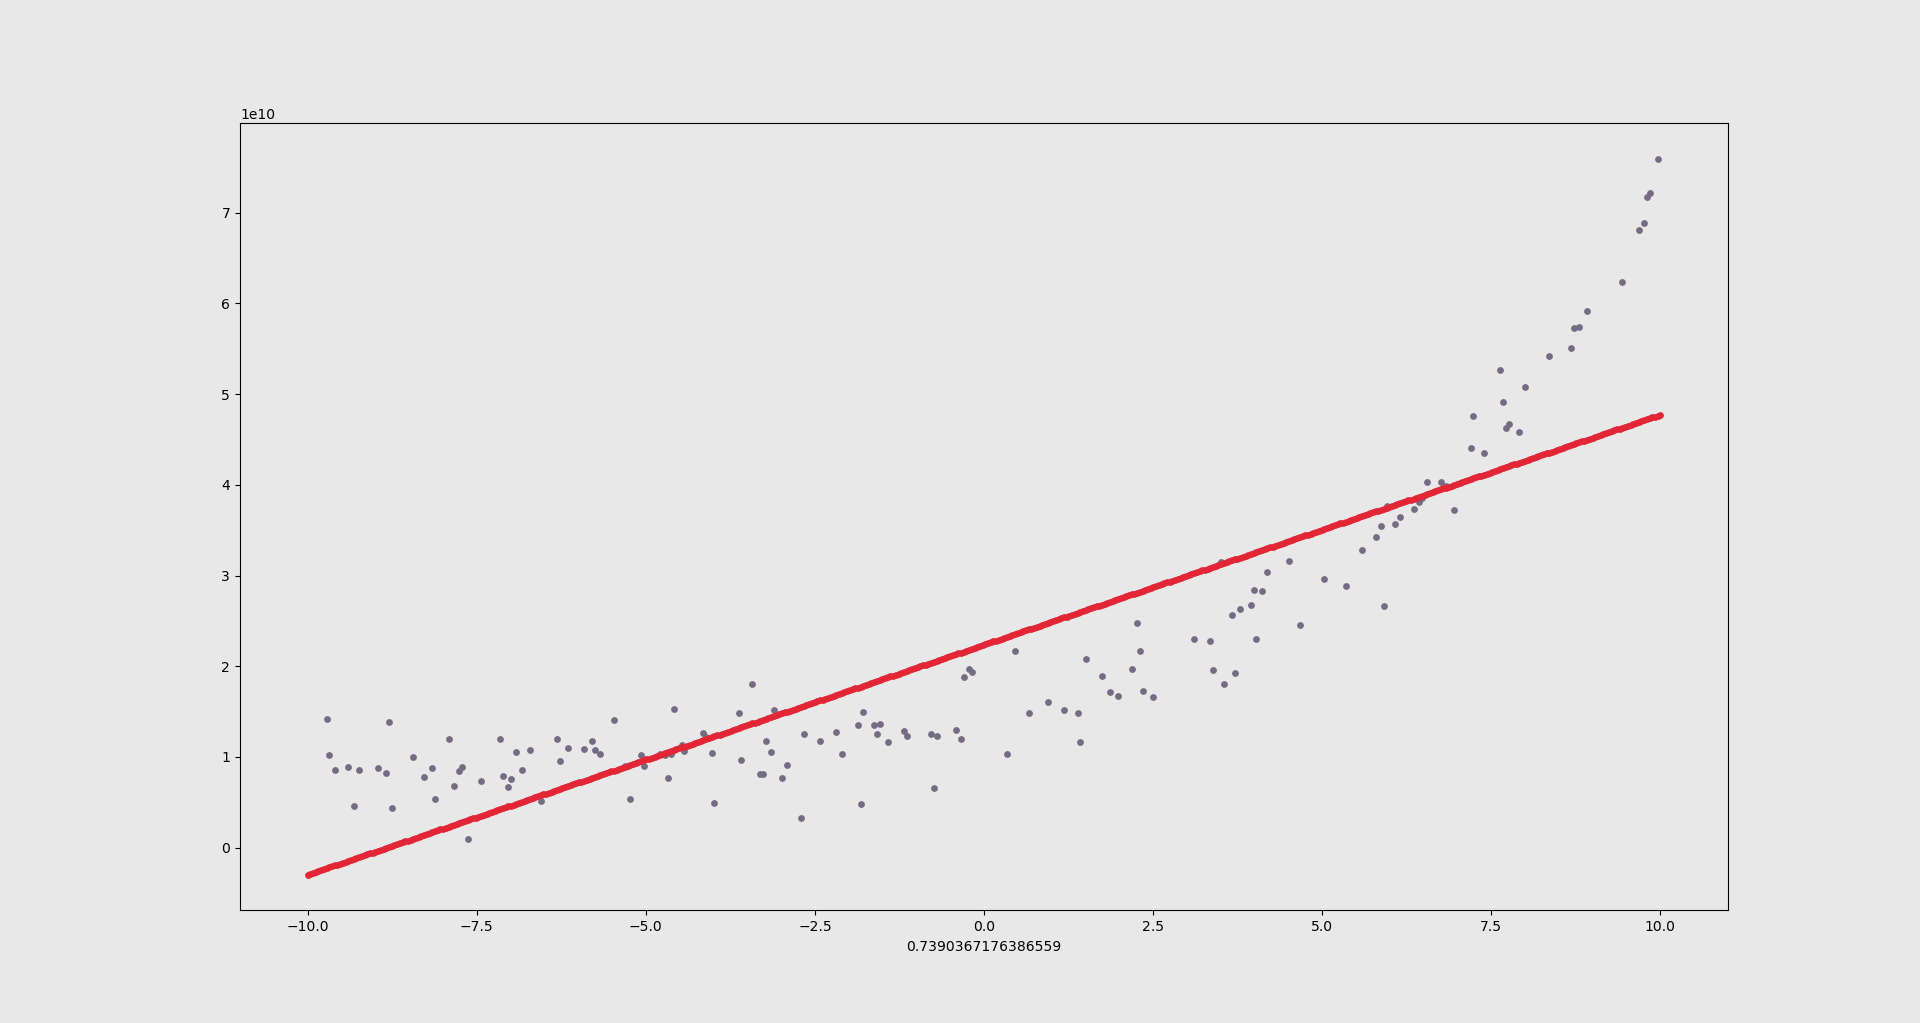

## 4. Полиномиальная регрессия

Для полиномиальной регрессии используем функцию PolynomialFeatures библиотеки sklearn, для вычисления ошибки пользуемся функцией r2_score библиотеки sklearn

### 4.1 Полиномиальная регрессия второго порядка

Пробуем приблизить нашу функцию полиномом второй степени и считаем ошибку:

In [ ]:
quad_reg = PolynomialFeatures(degree=2)
X_poly = quad_reg.fit_transform(X_train)

lin_for_quad = LinearRegression()
lin_for_quad.fit(X_poly, Y_train)

quad_prediction = lin_for_quad.predict(quad_reg.fit_transform(X_test))
quad_see = r2_score(Y_test, quad_prediction)

Получаем следующие график и ошибку:

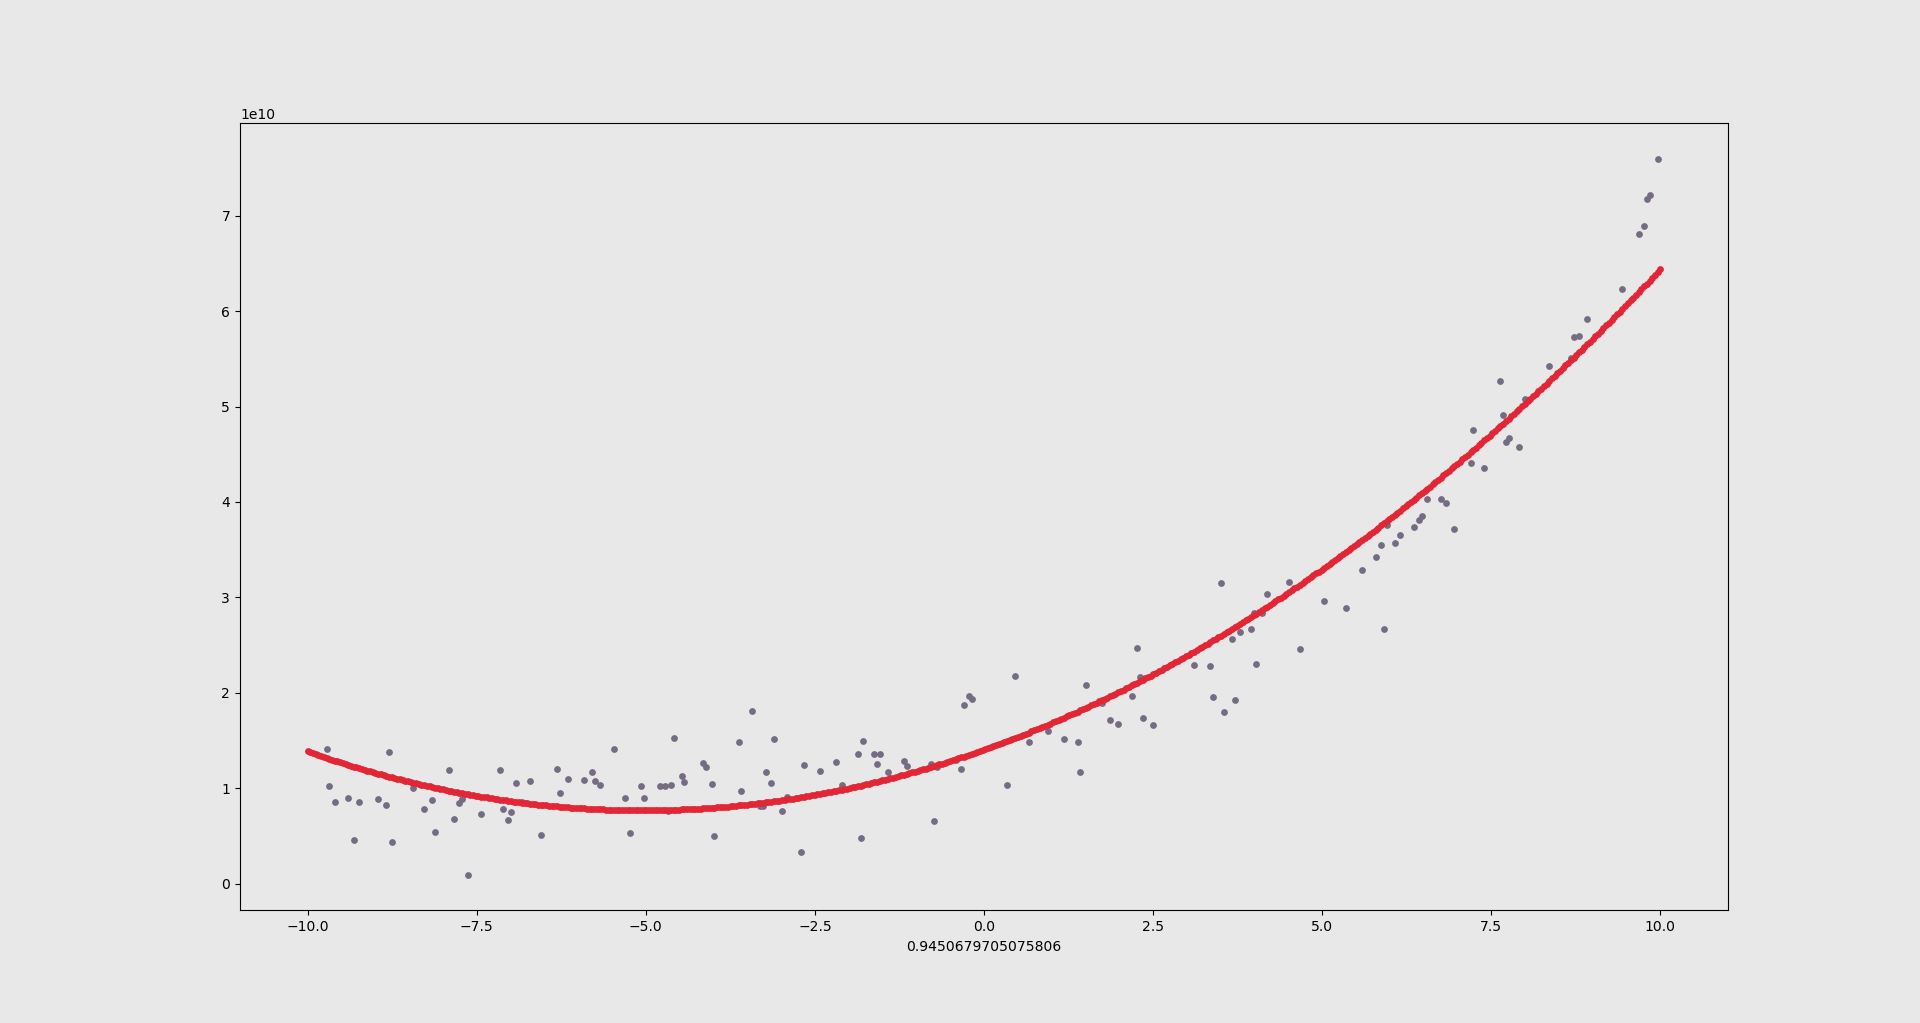

### 4.2. Полиномиальная регрессия третьего порядка

Пробуем приблизить нашу функцию полиномом третьей степени и считаем ошибку

In [ ]:
cubic_reg = PolynomialFeatures(degree=3)
X_poly = cubic_reg.fit_transform(X_train)

lin_for_cubic = LinearRegression()
lin_for_cubic.fit(X_poly, Y_train)

cubic_prediction = lin_for_cubic.predict(cubic_reg.fit_transform(X_test))
cubic_see = r2_score(Y_test, cubic_prediction)

Получаем следующие график и ошибку:

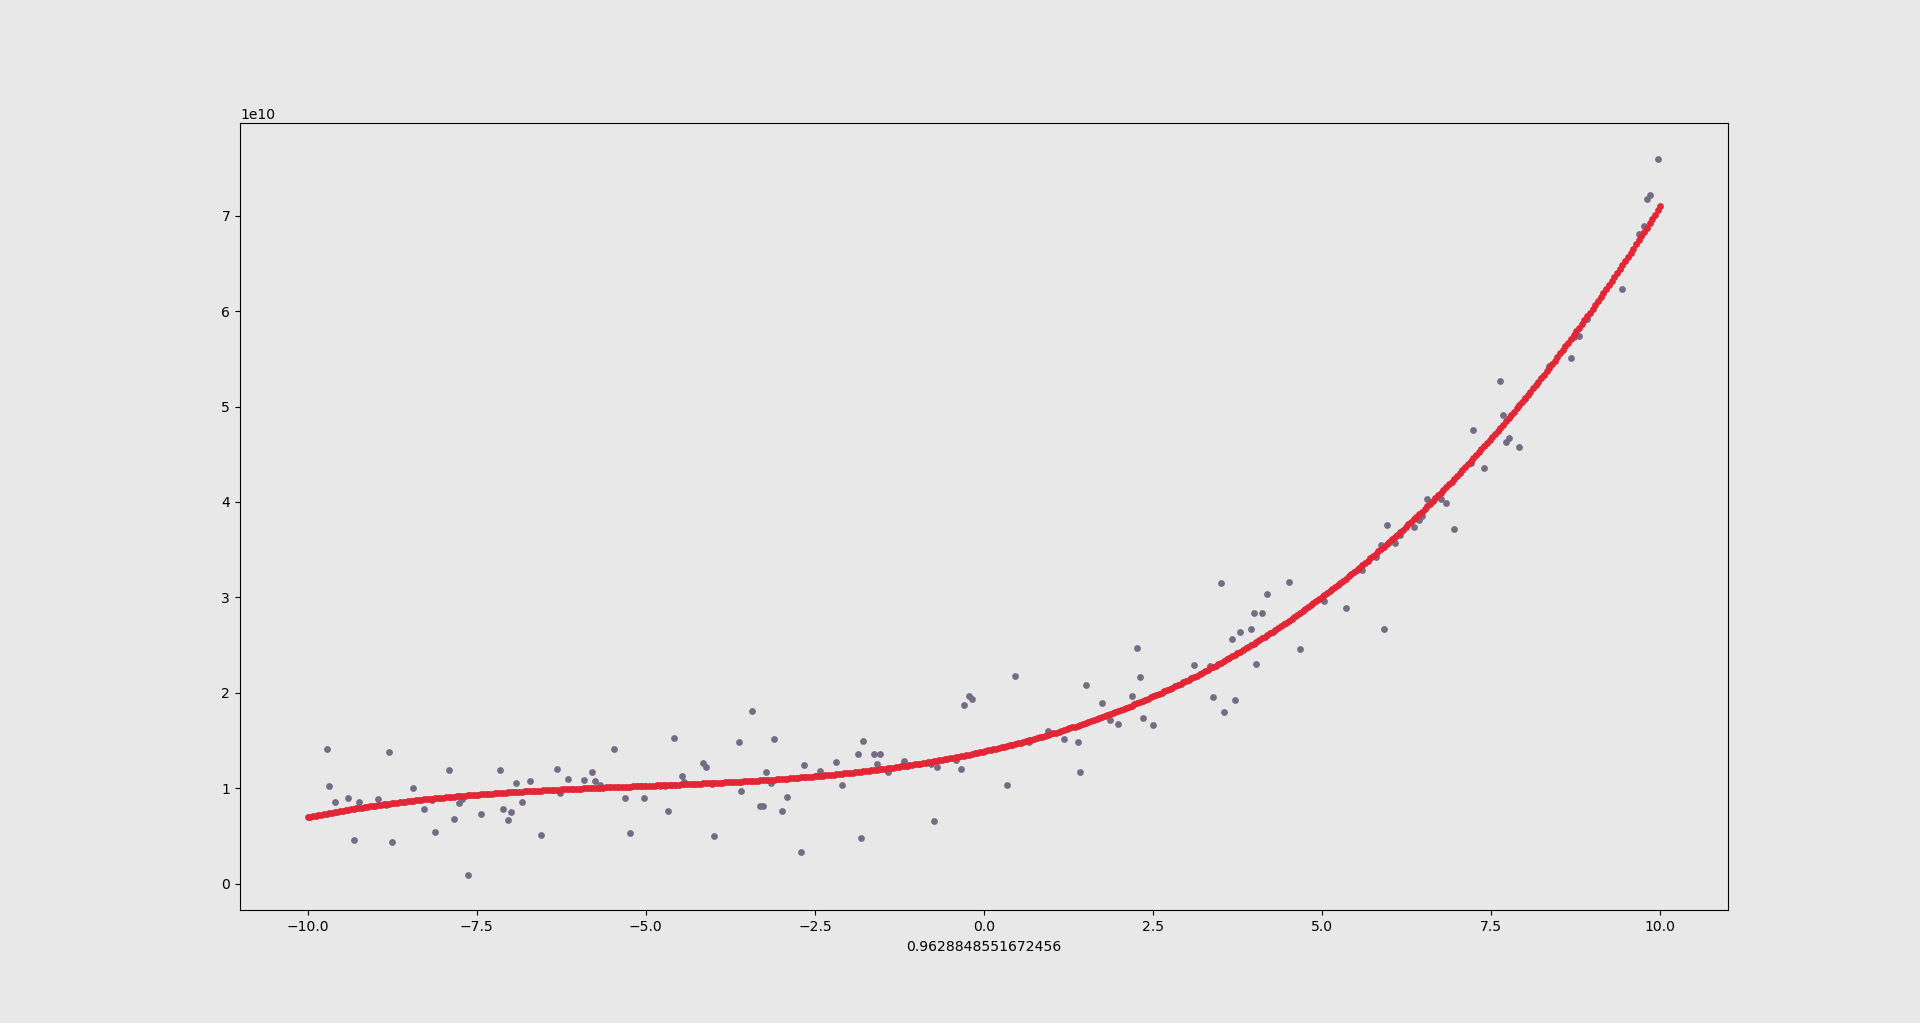

### 4.3. Полиномиальная регрессия четвёртого порядка

Пробуем приблизить нашу функцию полиномом четвёртой степени и считаем ошибку:

In [ ]:
fourth_reg = PolynomialFeatures(degree=4)
X_poly = fourth_reg.fit_transform(X_train)

lin_for_fourth = LinearRegression()
lin_for_fourth.fit(X_poly, Y_train)

fourth_prediction = lin_for_fourth.predict(fourth_reg.fit_transform(X_test))
fourth_see = r2_score(Y_test, fourth_prediction)

Получаем следующие график и ошибку:

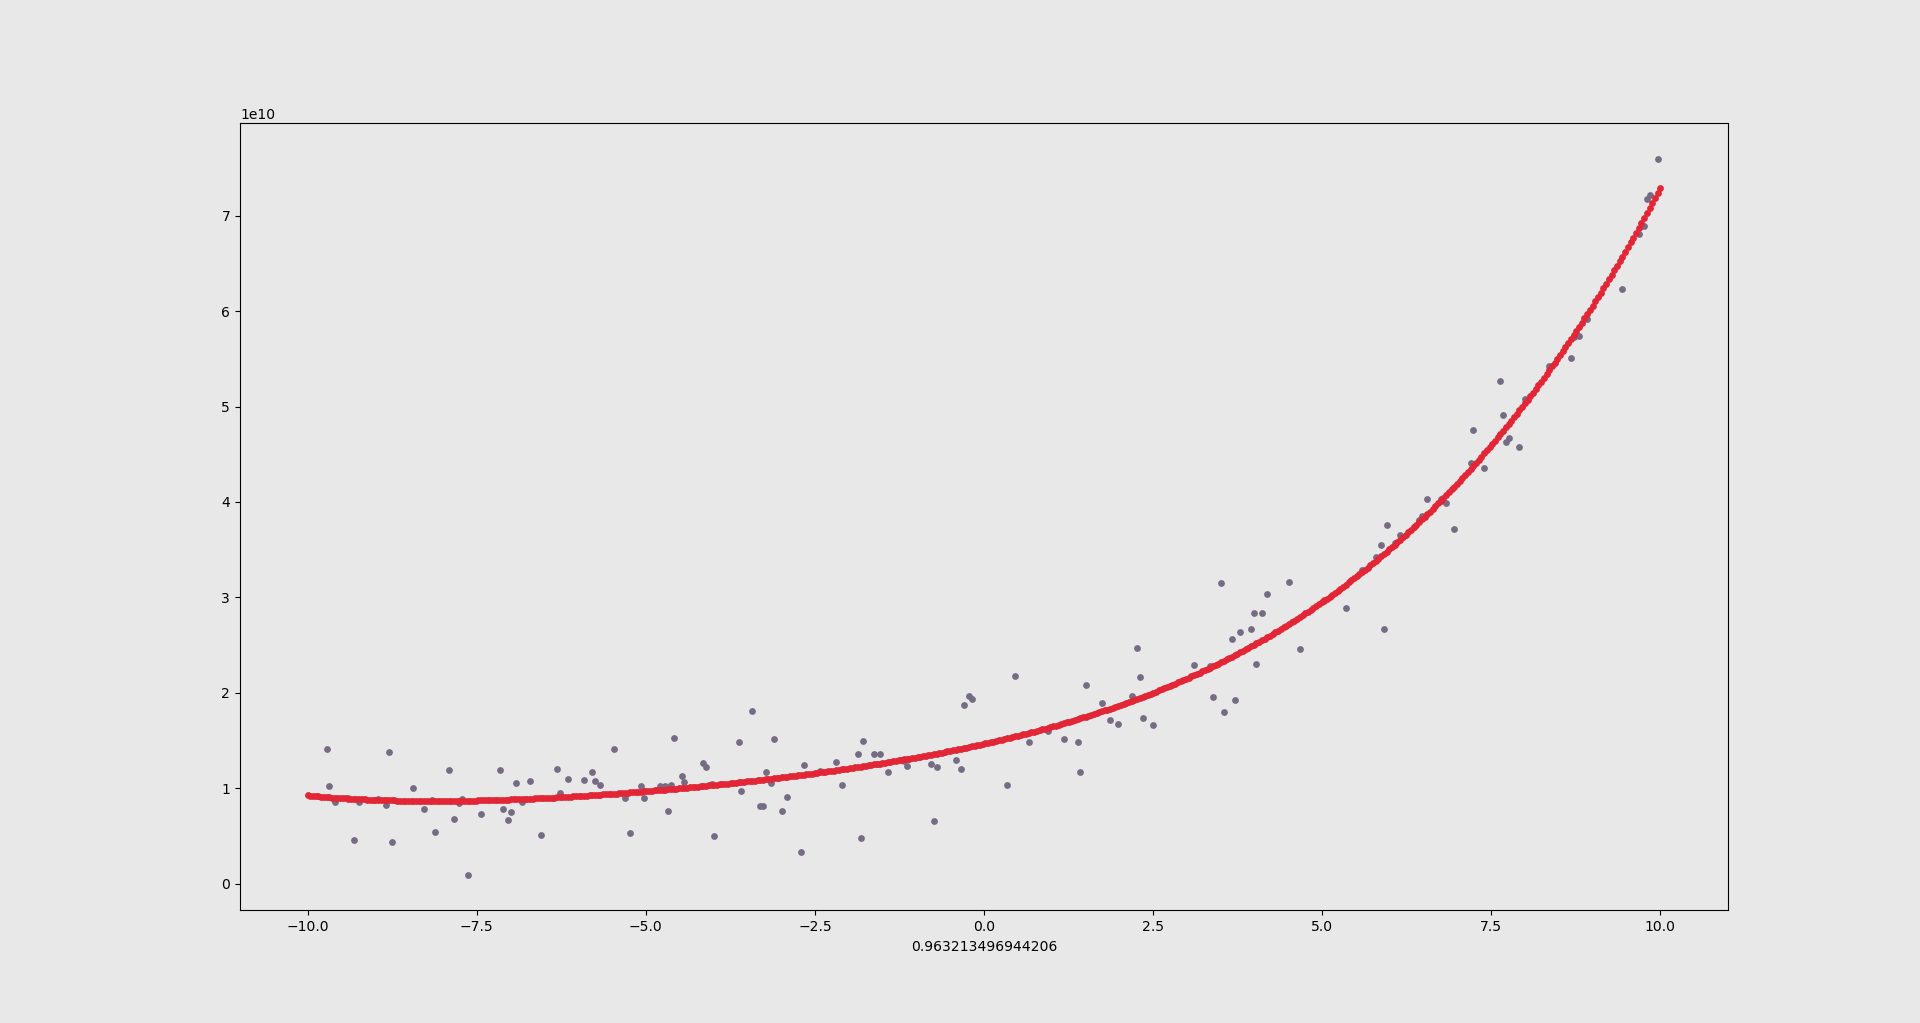

## 5. Экспоненциальная регрессия

Для экпоненциальной регрессии воспользуемся линеаризацей экспоненциальной функции. Для этого воспользуемся функциями библиотеки sklearn:

In [ ]:
transformer = FunctionTransformer(np.log, validate=True)
Y_trans = transformer.fit_transform(Y_test)

lin_for_exp = LinearRegression()
result = lin_for_exp.fit(X_test, Y_trans)
Y_fit = result.predict(X_test)
exp_see = r2_score(Y_test, Y_fit)

Получаем следующие график и ошибку:

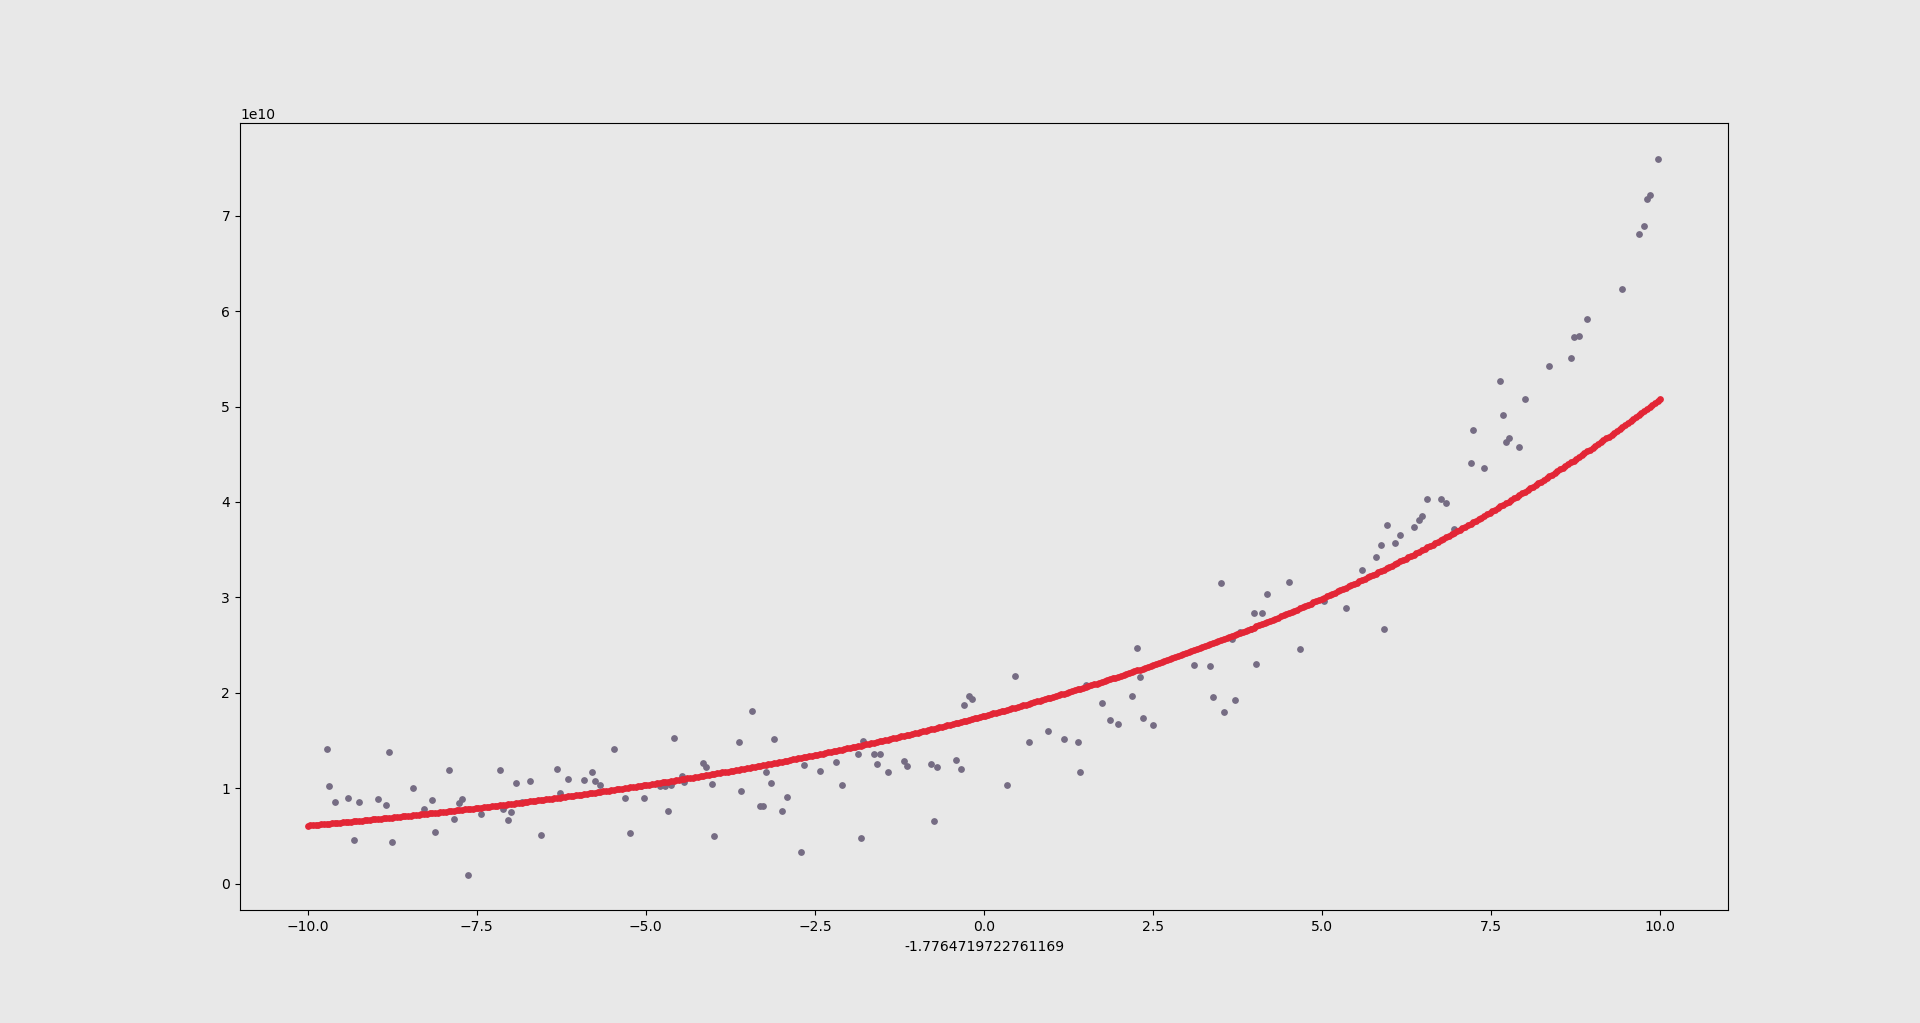

## 6. Вывод о лучшей регрессионной модели 

Проведя регрессиооный анализ и спавнив ошибки, можно сделать вывод, что наилучшей регрессионной можелью является полином четвёртой степени. Это вполне очевидно по графикам, которые приведены выше. При уменьшении шума данных разрыв в точности при полиномиальной регрессии третьего и четвёртого порядка становится ещё более наглядным


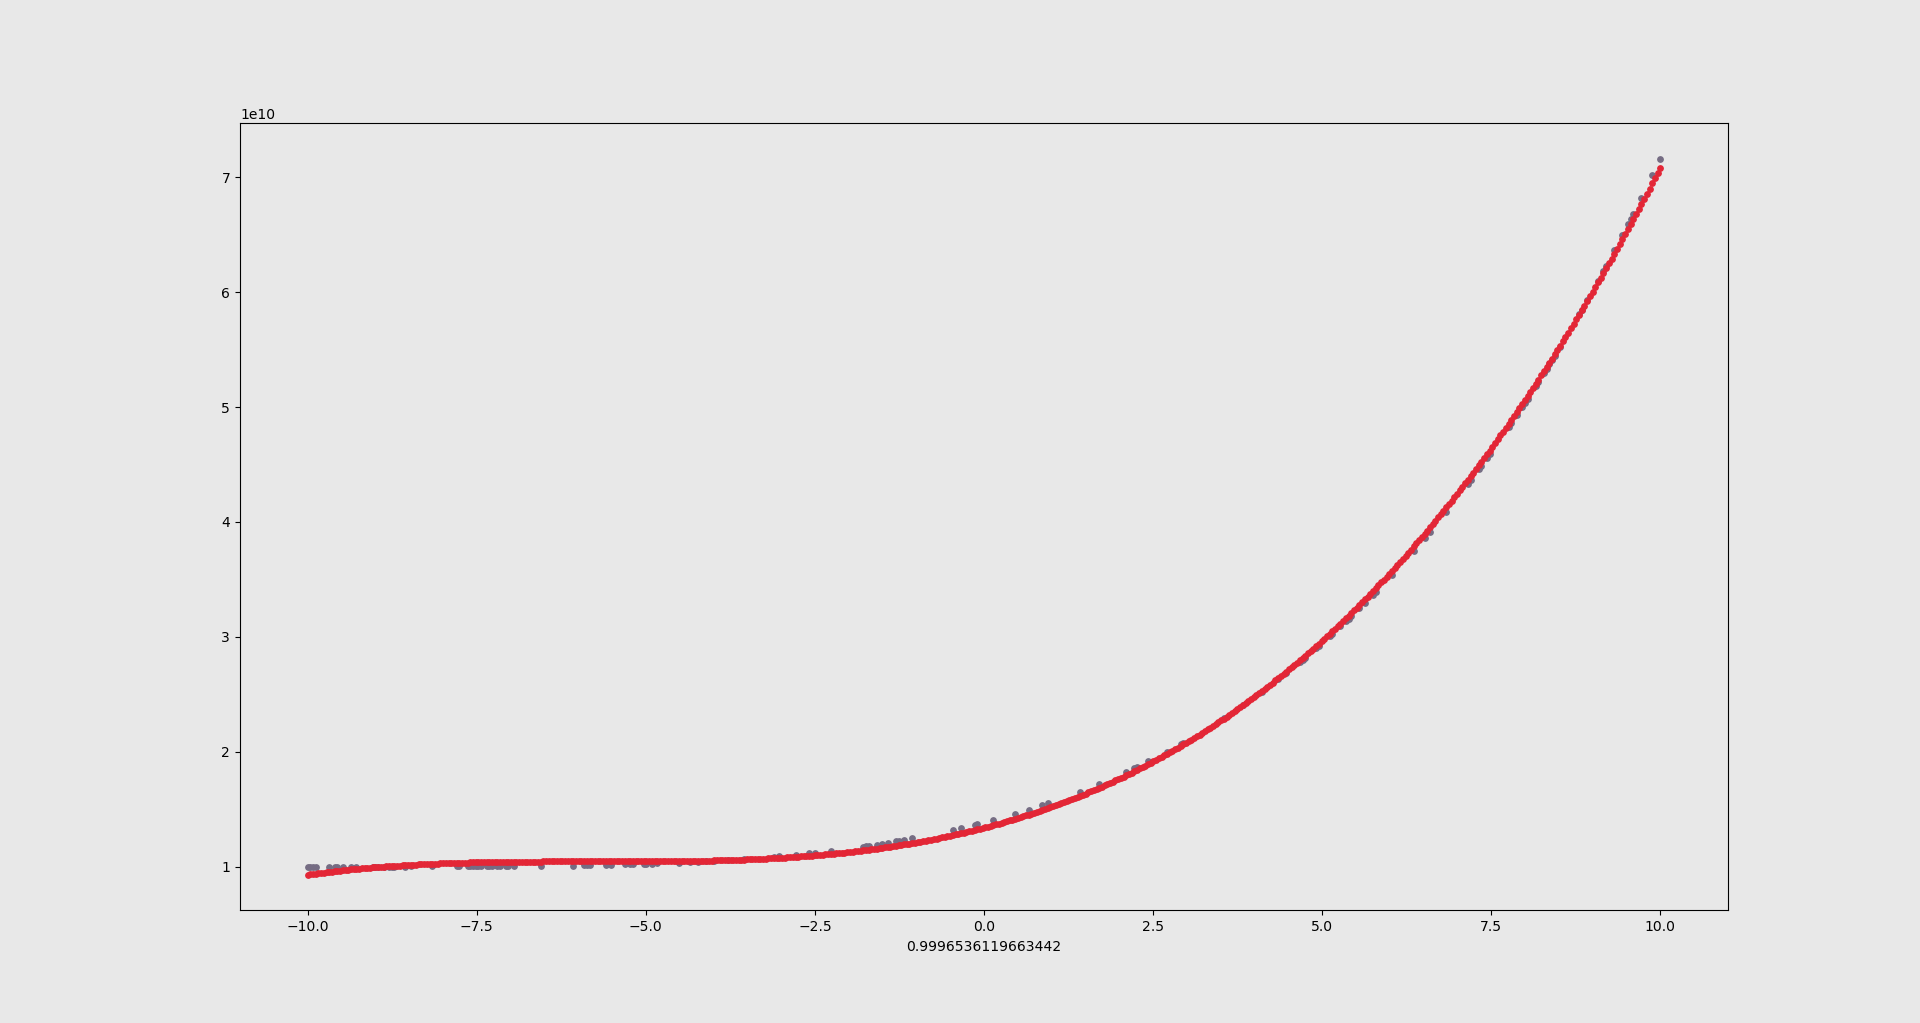

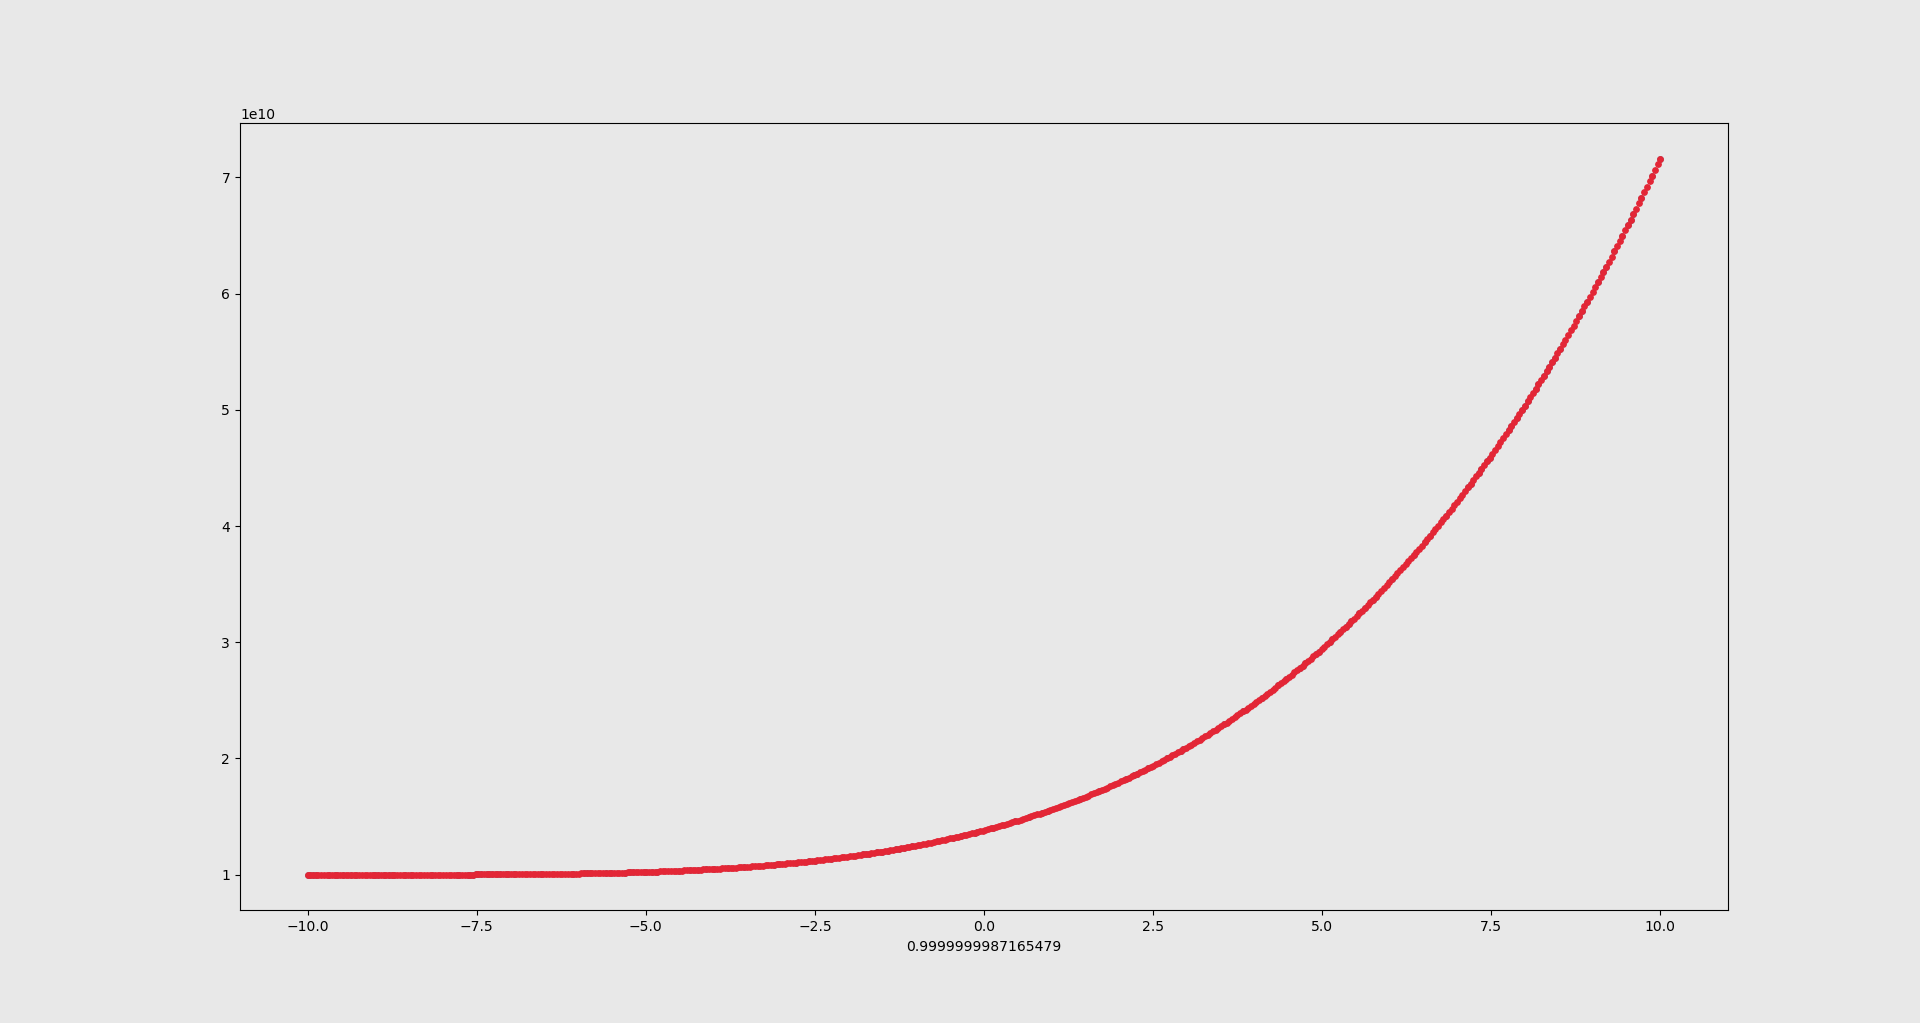